# Introdução



# Objetivos

- Verificar o comportamento da representação de sinais a partir da transformada de Fourier;
- Certificar a influência das características do sinal no domínio do tempo e frequência;
- Avaliar a energia do sinal.

# Bibliotecas utilizadas no codigo

In [2]:
# Packages install
%pip install -q numpy control matplotlib scipy sympy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Análise numérica
import numpy as np
# Análise analitica
import sympy as sym
# Plots
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
# Tipagem
from typing import List, Tuple
# Desabilitar warnings (somente para exportação)
# import warnings
# warnings.filterwarnings('ignore')

# Considerando o sinal x(t) definido como:
$$
x(t) = 
  \begin{cases}
    1 - |t|\text{;} & \quad \frac{-1}{2} \leqslant t \leqslant \frac{1}{2} \\
    \text{0; } & \quad \text{ otherwise} \\
  \end{cases}
$$

## Esboce o sinal x(t) no intervalo $-2 \leqslant t \leqslant 2$

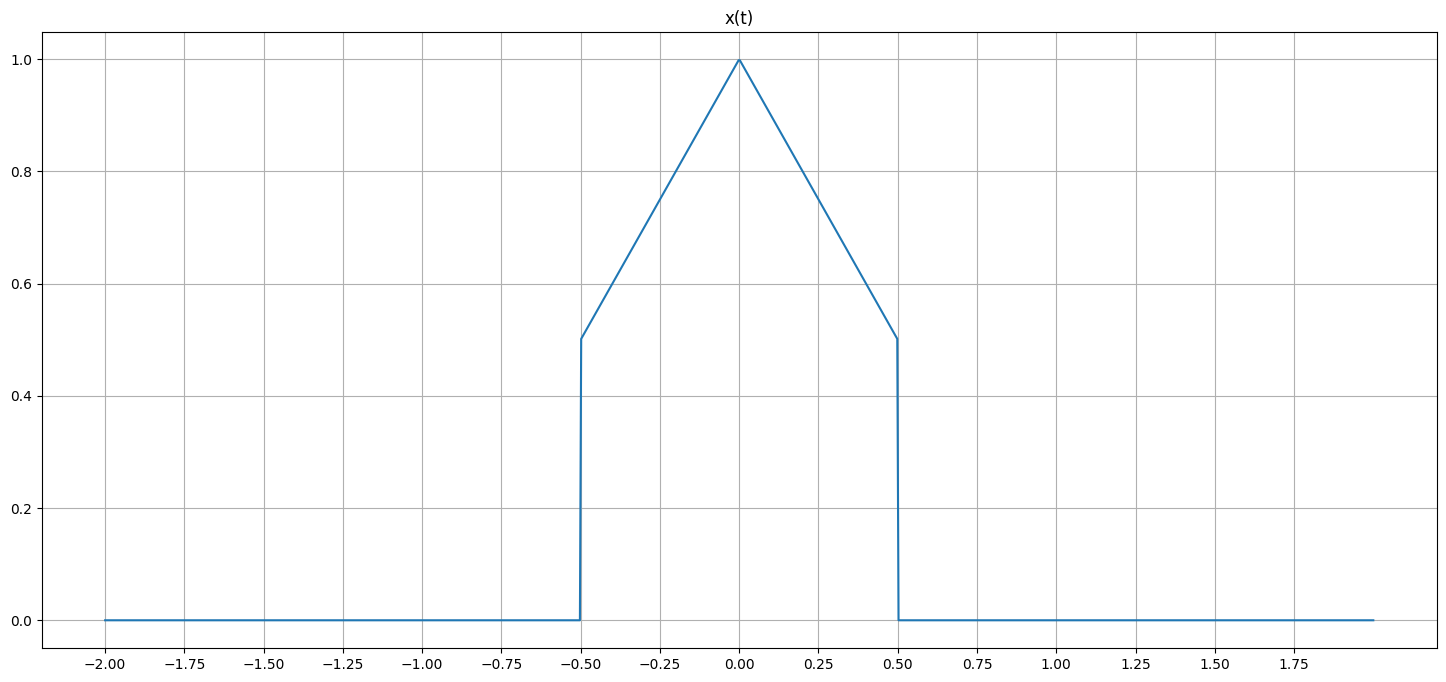

In [4]:
# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))


t = np.linspace(-2, 2, 1000)

fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max(), 0.5/2))
ax.grid(visible=True)


## Use a diferenciação temporal e outras propriedades da transformada de Fourier para determinar X(ω). 
A única integração que você deve usar é determinar o componente DC X(0).


### Usando a propiedade linear da transformada


$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então o sinal pode ser desconstruido em:

$$pulso(-0.5, 0.5) + (0.5 -|t|)$$

$$x1(t) = (0.5 -|t|)$$

$$x2(t) = pulso(-0.5, 0.5)$$


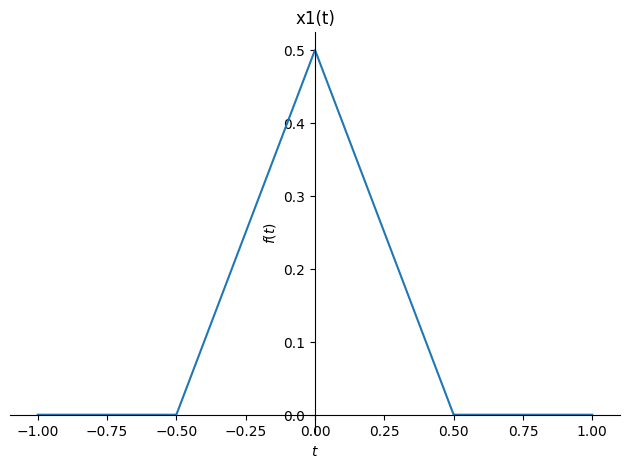

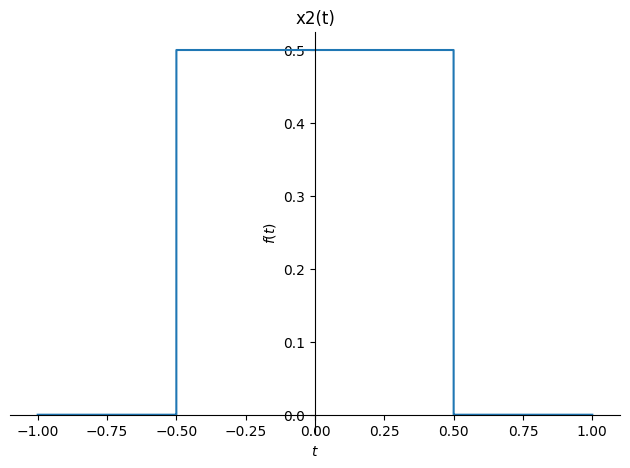

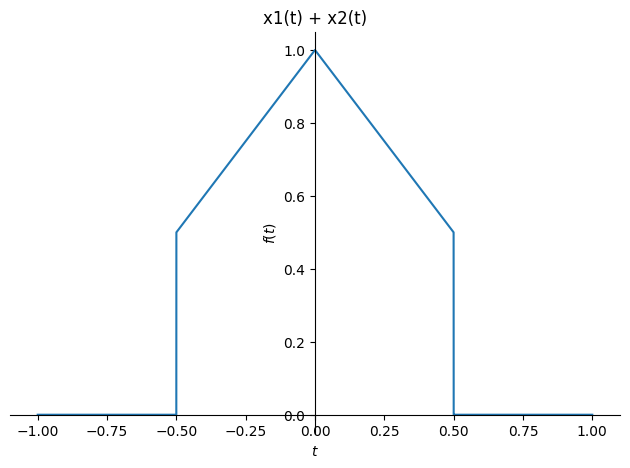

In [5]:
def abs_sym(x):
    return sym.sqrt(sym.Pow(x, 2))

t = sym.Symbol('t')
# Definindo x1(t)
x1_t = (0.5 - abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))

x2_t = 0.5 * (sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))

sym.plot(x1_t, (t, -1, 1), title="x1(t)")
sym.plot(x2_t, (t, -1, 1), title="x2(t)")
sym.plot(x1_t + x2_t, (t, -1, 1), title="x1(t) + x2(t)")



### Calculando X1(w)

#### Usando a diferenciação temporal

Usando a propiedade da diferenciação temporal:
$$-jwX(w) = \frac{dx}{dt}$$
e
$$-w^2X(w) = \frac{d^2x}{d^2t}$$

então:

Para calcular a transformada de Fourier desse pulso, vamos diferenciá-lo várias vezes. Primeiro, obtemos a primeira derivada, dx/dt, que é uma função constante. No entanto, dx/dt apresenta descontinuidades em t = 1/2 e t = -1/2, onde ocorrem saltos positivos de 1 e saltos negativos de -1, respectivamente tem uma descontinuidade adicional em t = 0, onde ocorre um salto negativo de -2. É importante lembrar que a derivada de um sinal em um ponto de descontinuidade resulta em um impulso nesse ponto, com uma força igual ao valor absoluto do salto. Portanto, a segunda derivada, d2x/dt2, será uma sequência de impulsos.

Na figura a seguir tem o esboço das derivadas

então usando a propiedade da deferenciação temporal

$$ -w²X1(w) = \delta(t - \frac{1}{2}) -2\delta(t) + \delta(t + \frac{1}{2}) $$

logo

$$ X1(w) = \frac{\delta(t - \frac{1}{2}) -2\delta(t) + \delta(t + \frac{1}{2})}{-w^2}$$

fazendo a transformada dos deltas

Obs: $\delta(t - t_0) = e^{-jwt_0}$

$$ X1(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2}$$

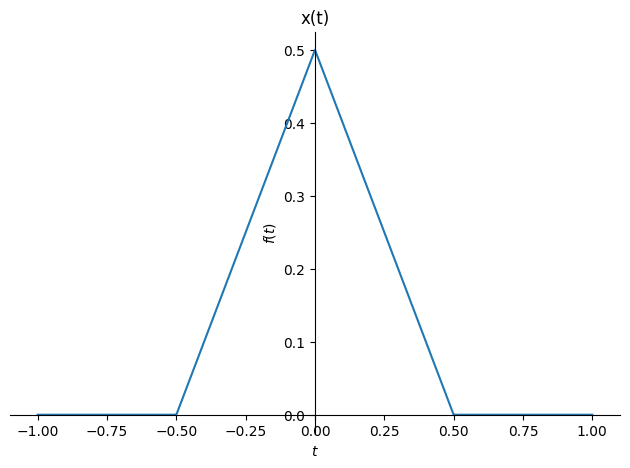

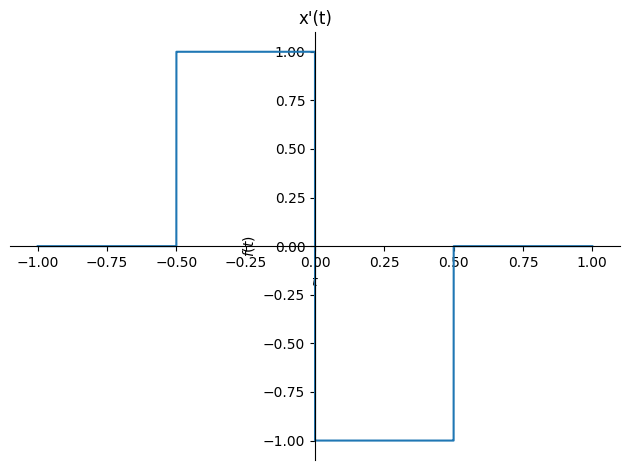

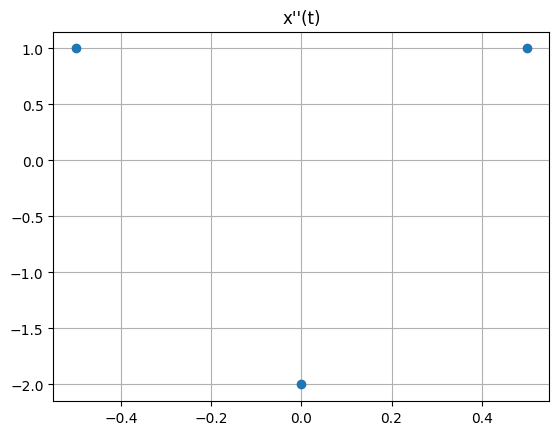

In [6]:
def abs_sym(x):
    return sym.sqrt(x**2)

t = sym.Symbol('t')

# Definindo x1(t)
x1_t = (0.5 - abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))
# Derivando x1(t)
dx1_t = sym.diff(x1_t)
# Segunda derivada de x1(t)
ddx1_t = sym.diff(dx1_t)


sym.plot(x1_t, (t, -1, 1), title="x(t)")

sym.plot(dx1_t, (t, -1, 1), title="x'(t)")

plt.plot([0.5, -0.5, 0], [1, 1, -2], "o", )
plt.title('x\'\'(t)')
plt.grid()

#### Verificando a transformada de X1(w)

/home/alejopm/eng/SIS/sinais-e-sistemas/T2/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


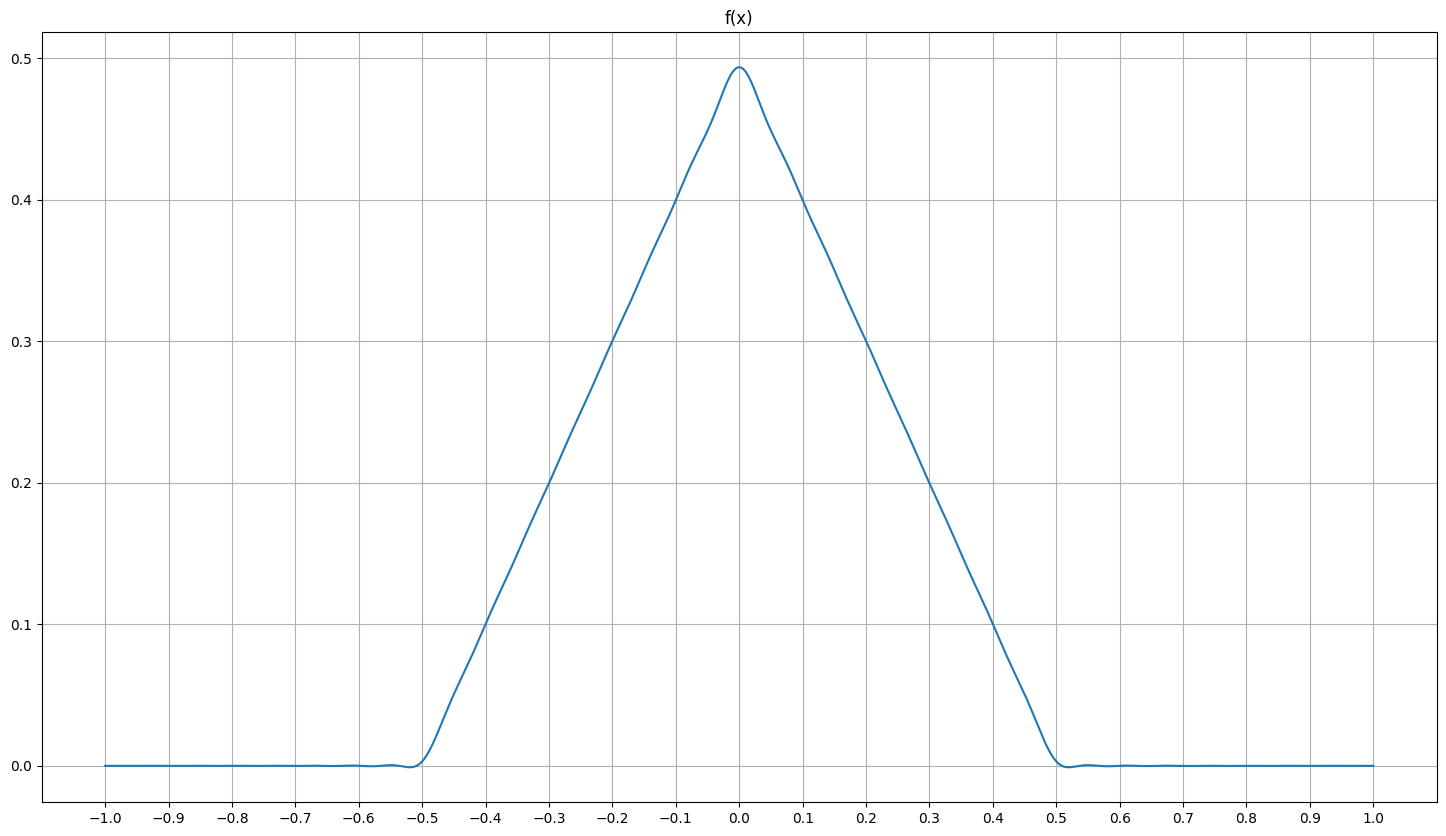

In [7]:
def x_w(w):
    return ((np.exp(1j * (w / 2))) + -2 + (np.exp(-1j * (w / 2)))) / (-(w)**2)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

# limites do grafico
x_min = -1
x_max = 1
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-100, 100, 1000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t))

# Show the plot
plt.show()

### Calculando X2(w)

#### Usando a diferenciação temporal

Usando a propiedade da diferenciação temporal:
$$-jwX(w) = \frac{dx}{dt}$$

então:

Para calcular a transformada de Fourier de uma função retangular (rect), vamos diferenciá-la uma vez. A função retangular é constante e possui duas descontinuidades em -1/2 e 1/2, cada uma com uma altura de 1/2. De acordo com a propriedade de que a derivada de um sinal em um ponto de descontinuidade resulta em um impulso nesse ponto, com uma força igual ao valor absoluto do salto, a primeira derivada será uma sequência de impulsos.

Usando a propiedade da diferenciação temporal:

$$ -jwX2(w) = \frac{1}{2}\delta(t - \frac{1}{2}) - \frac{1}{2}\delta(t + \frac{1}{2}) $$

fazendo a transformada dos deltas

Obs: $\delta(t - t_0) = e^{-jwt_0}$

$$ X2(w) = \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$


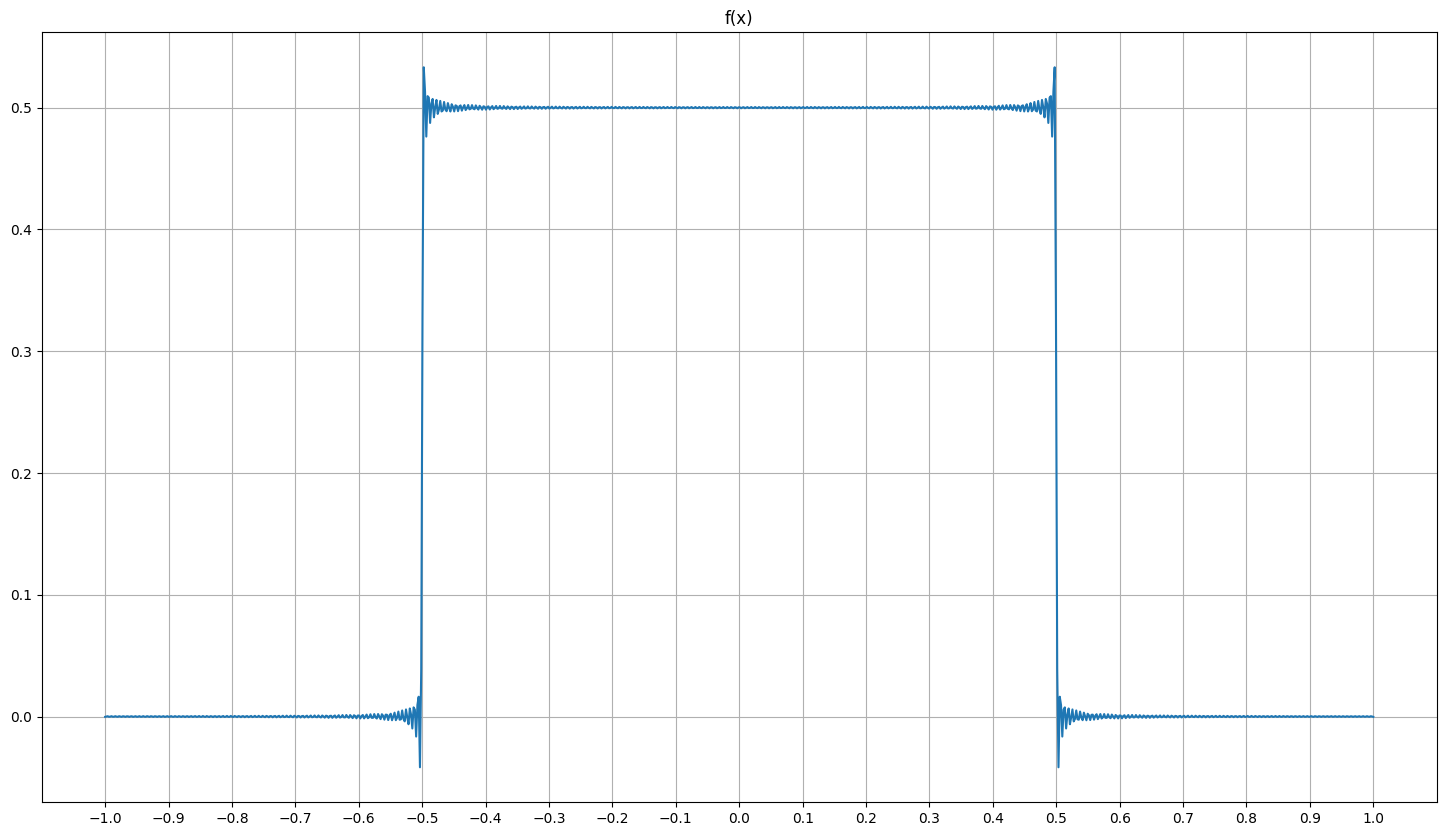

In [8]:
def x_w(w):
    return ((np.exp(1j * (w / 2)) / 2) - (np.exp(-1j * (w / 2))) /2) / (1j * w)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

# limites do grafico
x_min = -1
x_max = 1
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-1000, 1000, 1000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t))

# Show the plot
plt.show()

### Calculando X(w)

Usando a propiedade linear 
$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então:

$$X(w) = X1(w) + X2(w)$$

$$ X1(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2}$$

$$ X2(w) = \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$

$$ X(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2} + \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$

In [9]:
w = sym.Symbol('w')

X1_w = (sym.exp(sym.I * w / 2) - 2 + sym.exp(-sym.I * w / 2)) / (-(w**2))
X2_w = ((sym.exp(sym.I * w / 2) / 2) - (sym.exp(-sym.I * w / 2) / 2)) / -(sym.I * w)

X_w = X1_w + X2_w

display(sym.simplify(X_w))

(-I*w*(1 - exp(I*w)) + 2*(2 - exp(I*w/2))*exp(I*w/2) - 2)*exp(-I*w/2)/(2*w**2)

## Usando um programa computacional, verifique a exatidão de X(ω) sintetizando a partir da reprodução de 3 períodos do sinal original no domínio do tempo x(t)

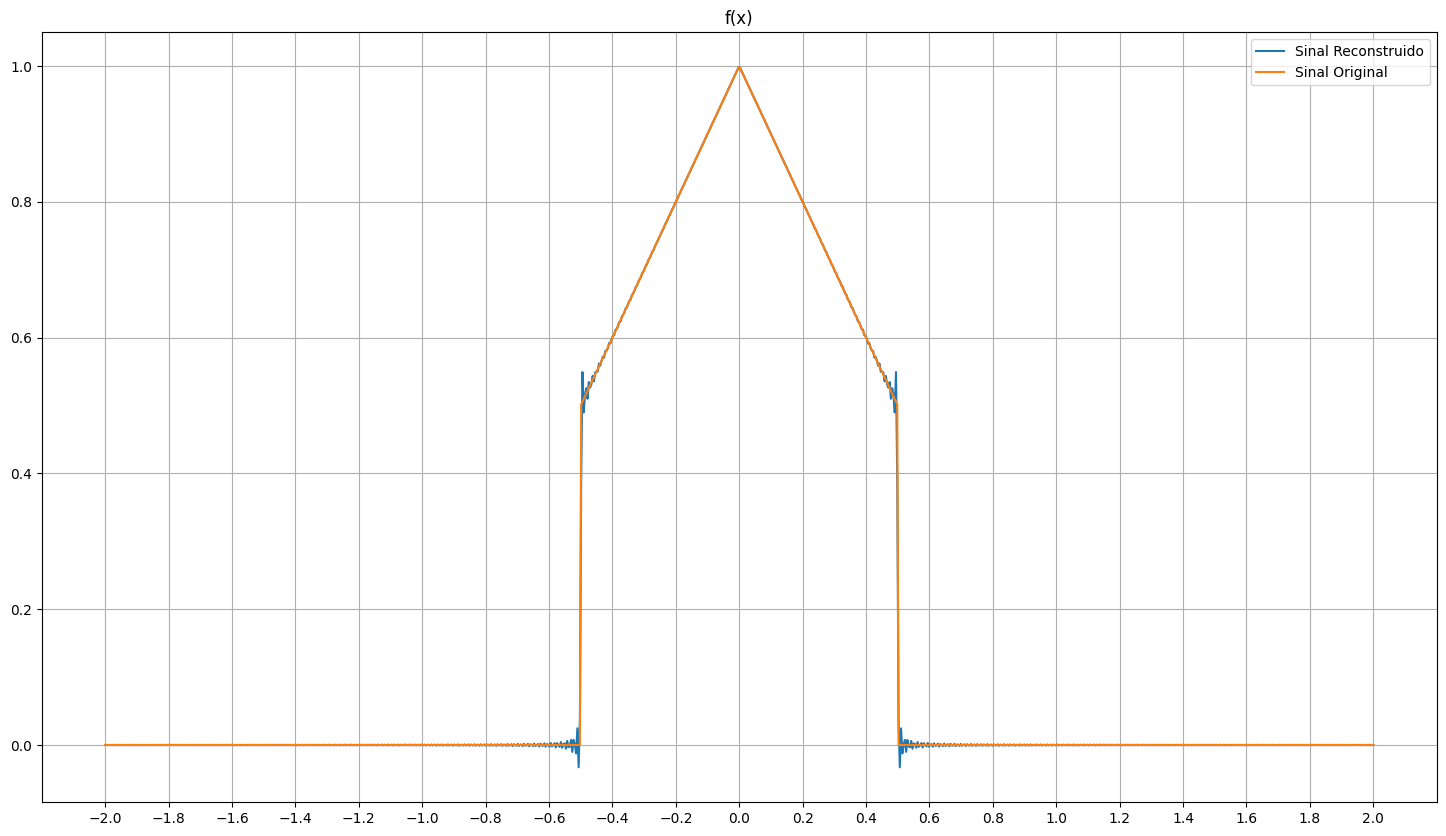

In [10]:
def x1_w(w):
    return ((np.exp(1j * (w / 2))) + -2 + (np.exp(-1j * (w / 2)))) / (-(w)**2)

def x2_w(w):
    return ((np.exp(1j * (w / 2)) / 2) - (np.exp(-1j * (w / 2))) /2) / (1j * w)

def x_w(w):
    return x1_w(w) + x2_w(w)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

def x_t(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))

# limites do grafico
x_min = -2
x_max = 2
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-600, 600, 10000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t), label="Sinal Reconstruido")
ax.plot(t, x_t(t), label="Sinal Original")

ax.legend()
# Show the plot
plt.show()

# Considere o sinal:
$$x(t) = |t|rect (\frac{t − 1}{3})$$

## Esboce o sinal x(t) no intervalo −5 ≤ t ≤ 5

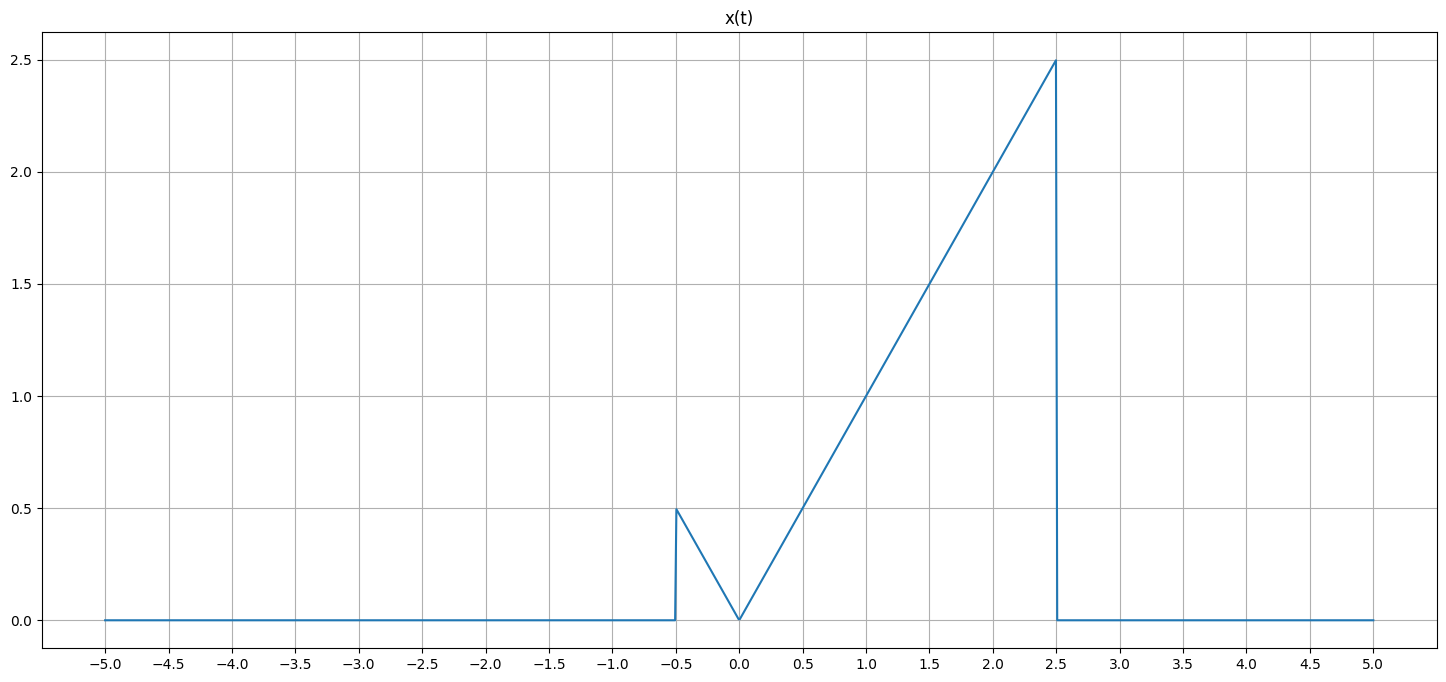

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return (np.abs(t) * pulse(t, -0.5, 2.5))

# Definir o intervalo de tempo
t = np.linspace(-5, 5, 1000)

# Plotar o sinal x(t)
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max() + 0.001, t.max()/10))
ax.grid(visible=True)

### Usando a propiedade linear da transformada


$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então o sinal pode ser desconstruido em:

$$pulso(-0.5, 2.5) - (|t|)$$

$$x1(t) = (|t|)$$

$$x2(t) = 2.5 * pulso(-0.5, 2.5)$$

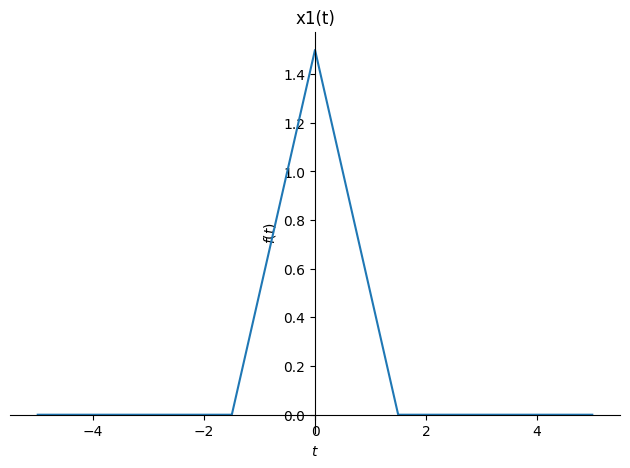

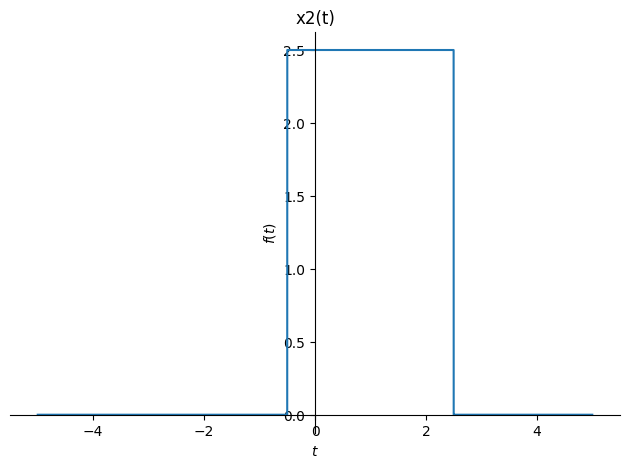

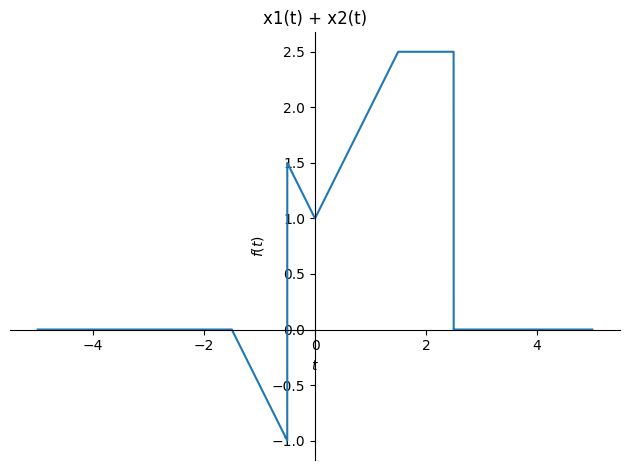

In [12]:
def abs_sym(x):
    return sym.sqrt(sym.Pow(x, 2))

t = sym.Symbol('t')
# Definindo x1(t)
x1_t = (1.5-abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(3, 2)) - sym.Heaviside(t + sym.Rational(-3, 2)))

x2_t = 2.5 * (sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-5, 2)))

sym.plot(x1_t, (t, -5, 5), title="x1(t)")
sym.plot(x2_t, (t, -5, 5), title="x2(t)")
sym.plot(-x1_t + x2_t, (t, -5, 5), title="x1(t) + x2(t)")

In [53]:
((0.5 * np.exp((1j * w) / 2)) + (2.5 * np.exp(-1j * w * 2.5))) + 

(((-np.exp((1j * w) / 2)) + 1) / (-(w ** 2))) + 

SyntaxError: invalid syntax (178936036.py, line 1)

/home/alejopm/eng/SIS/sinais-e-sistemas/T2/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


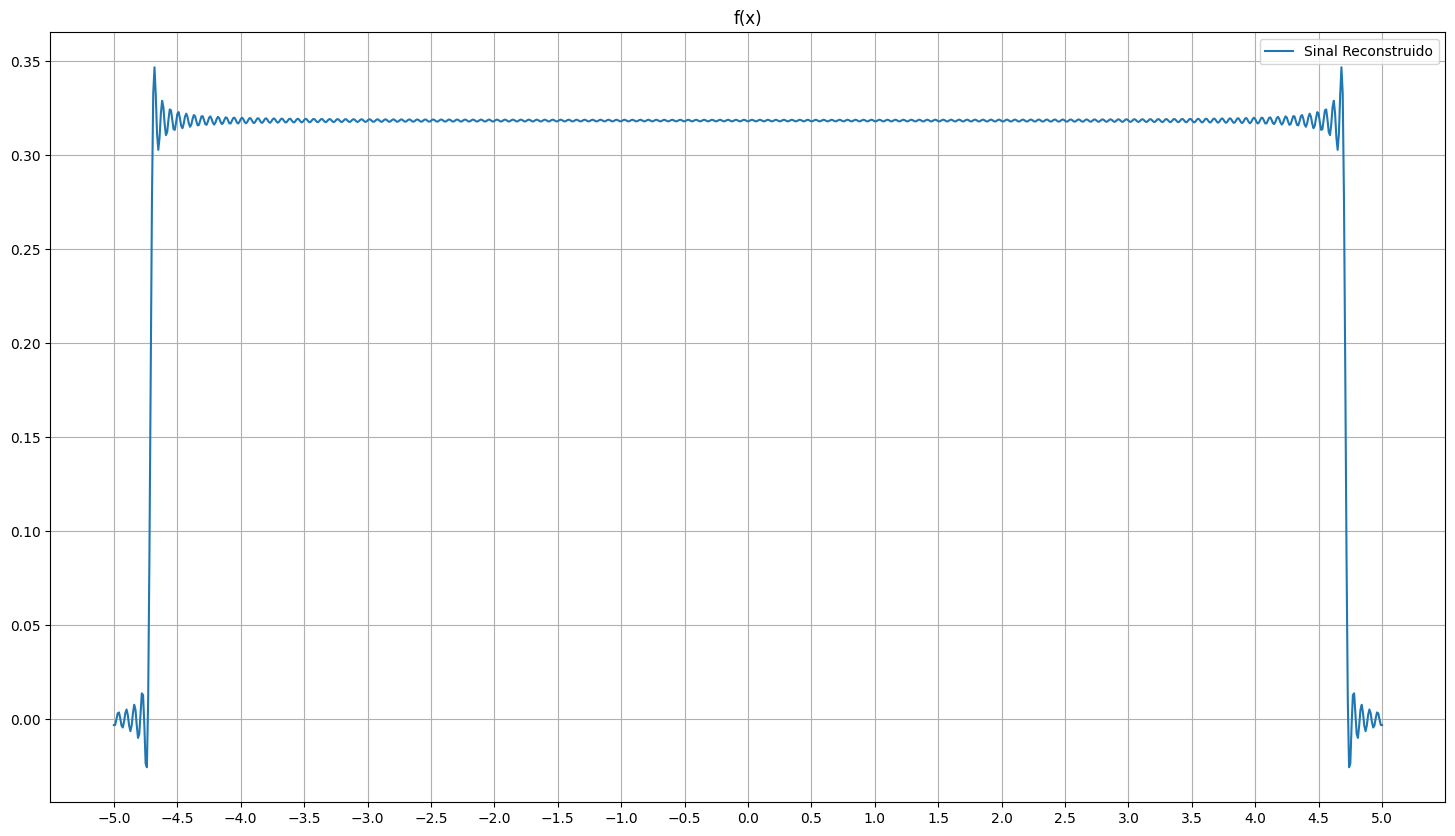

In [84]:
w = sym.Symbol('w')
d_sinc = sym.diff(sym.sinc((w - 1)/6))
d_sinc = sym.lambdify(w, d_sinc)
d_sinc2 = sym.diff(sym.sinc((-w - 1)/6))
d_sinc2 = sym.lambdify(w, d_sinc2)

def x1_w(w):
    return  3 * np.sinc((w * 3) / 2)
#((1 / (np.pi / 2)) * np.sinc(w / np.pi ))
      #(((-np.exp((-1j * w) * -0.5)) + 1) / (-(w ** 2))) + \
            #((1 + (-np.exp((-1j * w) * 2.5))) / (-(w ** 2))) + \
            #((0.5 * np.exp((-1j * w) * -0.5)) + \
            # (2.5 * np.exp((-1j * w) * 2.5)))

def x_w(w):
    return x1_w(w) 

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

def x_t(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))

# limites do grafico
x_min = -5
x_max = 5
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-100, 100, 10000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t), label="Sinal Reconstruido")
#ax.plot(t, x_t(t), label="Sinal Original")

ax.legend()
# Show the plot
plt.show()

/home/alejopm/eng/SIS/sinais-e-sistemas/T2/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


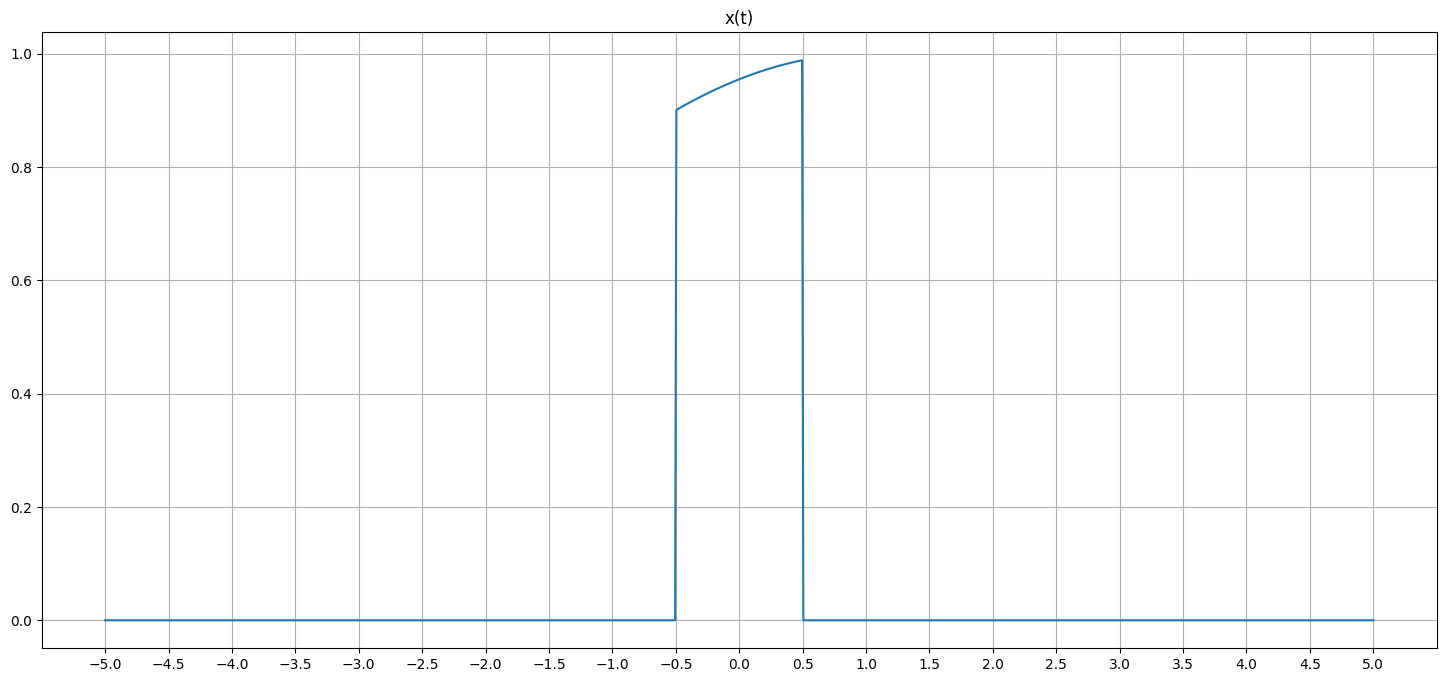

In [25]:

import numpy as np
import matplotlib.pyplot as plt

# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return (np.exp(-(1j * w)/2) (np.exp(3 i w) * (2 - 5 * 1j * w) - 4 e^((i w)/2) + i w + 2))/(2 sqrt(2 π) w^2)

# Definir o intervalo de tempo
t = np.linspace(-5, 5, 1000)

# Plotar o sinal x(t)
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max() + 0.001, t.max()/10))
ax.grid(visible=True)